In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install koreanize-matplotlib
plt.rcParams['axes.unicode_minus'] = False # - (마이너스)깨짐 방지
import koreanize_matplotlib
from google.colab import drive
drive.mount('/content/gdrive/')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.2 MB/s eta 0:00:00
Mounted at /content/gdrive/


In [2]:
distribution_centers = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/distribution_centers.csv')
events = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/events.csv')
order_items = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/order_items.csv')
inventory_items = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/inventory_items.csv')
orders = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/orders.csv')
products = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/products.csv')
users = pd.read_csv('/content/gdrive/MyDrive/the_look_ecommerce/thelook_users.csv')

In [3]:
# event기준으로 left join
merge_event_user = pd.merge(events, users,how = "left",left_on ='user_id',right_on ='id')
merge_event_user.rename(columns = {'id_x' : 'event_id'}, inplace = True)
merge_event_user.rename(columns = {'id_y' : 'user_origin_id'}, inplace = True)
merge_event_user.rename(columns = {'created_at_x' : 'event_created_at'}, inplace = True)
merge_event_user.rename(columns = {'created_at_y' : 'user_created_at'}, inplace = True)
merge_event_user.rename(columns = {'city_x' : 'event_city'}, inplace = True)
merge_event_user.rename(columns = {'city_y' : 'user_city'}, inplace = True)
merge_event_user.rename(columns = {'state_x' : 'event_state'}, inplace = True)
merge_event_user.rename(columns = {'state_y' : 'user_state'}, inplace = True)
merge_event_user.rename(columns = {'postal_code_x' : 'event_postal_code'}, inplace = True)
merge_event_user.rename(columns = {'postal_code_y' : 'user_postal_code'}, inplace = True)
merge_event_user.rename(columns = {'traffic_source_x' : 'event_traffic_source'}, inplace = True)
merge_event_user.rename(columns = {'traffic_source_y' : 'user_traffic_source'}, inplace = True)
merge_event_user

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,event_city,event_state,event_postal_code,browser,...,gender,user_state,street_address,user_postal_code,user_city,country,latitude,longitude,user_traffic_source,user_created_at
0,1917969,NaN,3,9395f670-3671-45f7-bb9a-9efc47b79c70,2022-09-12 06:21:00 UTC,129.52.135.73,São Paulo,São Paulo,02220-000,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1922384,NaN,3,f0163a4c-f2c9-4b7d-ac17-705b55f7c657,2023-09-08 00:40:00 UTC,151.135.125.0,São Paulo,São Paulo,02220-000,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1611526,NaN,3,2edc937a-699e-4285-b8eb-9817fd58a20c,2021-10-03 13:47:00 UTC,28.114.229.184,São Paulo,São Paulo,02675-031,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1346381,NaN,3,4a399089-8d0a-4b82-9c28-7d5dca684610,2023-09-25 03:19:00 UTC,110.177.119.67,São Paulo,São Paulo,02675-031,Safari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2167326,NaN,3,20c9ae70-07a6-4c08-a587-7c58058efe3a,2022-11-25 10:40:00 UTC,117.156.147.187,São Paulo,São Paulo,02675-031,Chrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422917,1146027,88355.0,7,0beb4c6c-115c-48bd-ad91-a385ecf1b31c,2024-02-03 04:07:09 UTC,33.209.152.136,Timperley,England,WA15,Safari,...,M,England,008 Lindsey Drive Suite 867,WA15,Timperley,United Kingdom,53.373022,-2.316911,Search,2023-12-17 06:29:00 UTC
2422918,1199658,92597.0,10,30f540a1-bd8a-4b4e-8a5a-ace0d14eaa16,2022-07-22 09:23:07 UTC,166.94.222.219,Batley,England,WF17,Chrome,...,M,England,61021 Cameron Road,WF17,Batley,United Kingdom,53.724340,-1.640988,Search,2022-07-04 10:30:00 UTC
2422919,1028077,79178.0,10,7ac4c690-532f-475f-bf22-9f1ecaf4d7bb,2020-12-22 07:23:57 UTC,24.8.102.30,Orrell,England,WN5,Firefox,...,M,England,5771 Mark Place,WN5,Orrell,United Kingdom,53.524774,-2.696855,Search,2020-04-22 10:52:00 UTC
2422920,318852,24795.0,10,290090dd-c192-4bbb-ae40-5268a639dadf,2022-05-28 06:41:36 UTC,157.195.53.22,Abbots Bromley,England,WS15,Safari,...,M,England,002 Nielsen Lodge Suite 526,WS15,Abbots Bromley,United Kingdom,52.776999,-1.902598,Search,2020-12-19 08:12:00 UTC


In [4]:
events['created_at'] = pd.to_datetime(events['created_at'], errors='coerce')
##created_at  datetiem으로 type 변경
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')
merge_event_user['user_created_at'] = pd.to_datetime(merge_event_user['user_created_at'], errors='coerce')
order_items['created_at'] = pd.to_datetime(order_items['created_at'], errors='coerce')
inventory_items['created_at'] = pd.to_datetime(inventory_items['created_at'], errors='coerce')

# WAU 유지하기 위해서 어떻게 해야할까
## 어떤 상품을 소싱해야와야할까?

In [5]:
#최근 방문한 사용자들이 가장 많이 본 카테고리
# 최근 방문한 사용자들이 가장 많이 cart로 이동한 카테고리
# 최근 방문한 사용자들의 가장 많이 구매한 카테고리
# 최근 방문한 사용자들이 가장 많이 본 브랜드
events.loc[events['event_type'] == 'department'].head(10)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
7890,1670600,NaN,1,3c0bd300-2eed-4f87-a037-cfc9064393ec,2022-05-31 16:35:00+00:00,210.239.198.176,Sapporo,Hokkaido,005-0861,Firefox,Email,/department/men/category/socks/brand/dickies,department
7891,2339422,NaN,1,fc53db62-3563-4141-a205-b43cfb44d535,2022-12-24 17:09:00+00:00,20.18.52.93,Loda City,Akita,018-5201,Chrome,Adwords,/department/women/category/dresses/brand/saman...,department
7892,2128363,NaN,1,9b5881a2-51cb-484d-b6cd-3210cccbeff1,2022-10-09 13:26:00+00:00,71.252.151.10,São Paulo,São Paulo,02675-031,Chrome,Adwords,/department/women/category/accessories/brand/m...,department
7893,191937,15071.0,1,3158ddf4-f6a5-4cce-ad91-abf598b21282,2022-06-08 21:15:55+00:00,172.9.63.98,São Paulo,São Paulo,02675-031,Chrome,Email,/department/men/category/swim/brand/rvca,department
7894,176156,13775.0,1,3f66012c-29ca-412e-a1db-60aa648b4846,2022-02-15 20:51:06+00:00,35.240.212.53,São Paulo,São Paulo,02675-031,Chrome,Email,/department/men/category/socks/brand/smartwool,department
7895,336694,26121.0,2,6b141696-624c-4c34-b3ab-1a441f219662,2023-11-26 12:35:49+00:00,87.38.84.38,São Paulo,São Paulo,02675-031,Chrome,Email,/department/women/category/intimates/brand/war...,department
7896,793230,61183.0,4,84db38d8-dffa-42f8-9140-204a21998b7a,2021-03-09 14:59:03+00:00,146.10.162.250,São Paulo,São Paulo,02675-031,Chrome,Email,/department/women/category/maternity/brand/imp...,department
7897,360334,27894.0,2,dd601d66-7faa-4104-80cf-d4f89151df5a,2024-03-13 04:10:01+00:00,162.94.105.193,São Paulo,São Paulo,02675-031,Safari,YouTube,/department/women/category/maternity/brand/mot...,department
7898,747733,57696.0,2,a2eff638-41fc-402d-bc72-3491f078bca8,2022-10-29 12:45:46+00:00,57.130.91.243,São Paulo,São Paulo,02675-031,Chrome,Organic,/department/men/category/accessories/brand/sma...,department
7899,1071936,82577.0,1,ccd77f49-9dd4-4815-9a0a-3bb0d3f148c5,2024-05-21 13:30:04+00:00,94.82.233.82,São Paulo,São Paulo,02675-031,Chrome,Email,/department/women/category/fashionhoodies&swea...,department


In [6]:
events.loc[events['event_type'] == 'product'].head(10)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
15315,291843,22716.0,3,7371ecf9-ef87-46ae-93ad-b30e9d27e24f,2023-03-10 04:36:33+00:00,78.69.36.102,São Paulo,São Paulo,02220-000,Chrome,Email,/product/4795,product
15316,459085,35438.0,5,bd3cd638-5c40-4828-8797-644fceeb626e,2023-03-01 06:57:47+00:00,112.175.189.166,São Paulo,São Paulo,02675-031,IE,Email,/product/3096,product
15317,821830,63288.0,5,7d68b95d-615e-49ec-ad26-91e4855487af,2023-05-23 07:30:24+00:00,93.79.183.55,São Paulo,São Paulo,02675-031,Safari,Adwords,/product/17222,product
15318,2364207,NaN,1,b5854e9b-1aed-49c3-80b4-c785eea13563,2022-12-21 05:54:00+00:00,164.111.241.40,São Paulo,São Paulo,02675-031,Chrome,Email,/product/15739,product
15319,1583340,NaN,2,c0650105-1557-4ac7-8ee0-6a26059d846b,2023-02-16 12:05:00+00:00,154.24.59.209,São Paulo,São Paulo,02675-031,Chrome,Email,/product/4927,product
15320,1210221,93442.0,2,e5174b96-dd6d-4972-b96b-68d3c7f70996,2024-03-28 23:35:30+00:00,147.125.134.159,São Paulo,São Paulo,02675-031,IE,Email,/product/17016,product
15321,890466,68514.0,5,d0f5f3e4-2ba3-41f5-8a86-a66f9f2f5ec1,2021-03-24 04:30:45+00:00,30.65.138.111,São Paulo,São Paulo,02675-031,Chrome,Adwords,/product/17087,product
15322,534456,41228.0,3,d48f1cbd-be60-4b83-a18f-5a814207dcd3,2024-04-19 01:58:53+00:00,81.249.247.87,São Paulo,São Paulo,02675-031,Safari,Organic,/product/28187,product
15323,1947650,NaN,2,90ff40ca-524e-4044-9ae7-bd0fb140316d,2023-12-06 10:22:00+00:00,173.221.234.26,São Paulo,São Paulo,02675-031,Chrome,Facebook,/product/515,product
15324,2096869,NaN,2,faebf814-8c1f-4fe0-b4b2-0000ec24e0c9,2023-12-03 11:48:00+00:00,53.233.135.156,São Paulo,São Paulo,02675-031,Chrome,YouTube,/product/6457,product


In [7]:
# Filter the DataFrame to include only rows where 'event_type' is 'department'
department_events = events.loc[events['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4])

# Create a new DataFrame with 'id' and the extracted category
category_df = department_events[['id', 'category']]

# Display the result
print(category_df)

              id         category
7890     1670600            socks
7891     2339422          dresses
7892     2128363      accessories
7893      191937             swim
7894      176156            socks
...          ...              ...
2410769  2174314           active
2410770  1109885             plus
2410771  1290917  outerwear&coats
2410772    23540     sleep&lounge
2410773   813198      accessories

[593318 rows x 2 columns]


<ipython-input-7-6f25e7eee715>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4])


In [8]:
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')

# Define the date range for the recent 3 months
recent_3_months_start = '2023-12-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories overall during the recent 3 months
most_visited_categories = department_events['category'].value_counts().reset_index()
most_visited_categories.columns = ['category', 'visit_count']

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the most visited category per week
most_visited_weekly = weekly_visits.loc[weekly_visits.groupby('event_created_at')['visit_count'].idxmax()]

# Display the results
print("Overall most visited categories during the recent 3 months:")
print(most_visited_categories)

print("\nMost visited categories per week:")
print(most_visited_weekly)


<ipython-input-8-af33dfd4d011>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


Overall most visited categories during the recent 3 months:
                      category  visit_count
0                    intimates         9638
1                        jeans         9233
2   fashionhoodies&sweatshirts         8610
3                    tops&tees         8608
4                 sleep&lounge         8469
5                       shorts         8240
6                         swim         8203
7                     sweaters         8046
8                  accessories         7279
9              outerwear&coats         6687
10                      active         6519
11                   underwear         5506
12                       pants         5219
13                       socks         4387
14            suits&sportcoats         3862
15                     dresses         3829
16                   maternity         3763
17                        plus         3085
18               socks&hosiery         2701
19                pants&capris         2502
20             b

In [9]:
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Display the results
print("\nTop 7 most visited categories per week:")
print(weekly_top7)

<ipython-input-9-2dcc7793a7cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)



Top 7 most visited categories per week:
             event_created_at                    category  visit_count
0   2023-12-04 00:00:00+00:00  fashionhoodies&sweatshirts          176
1   2023-12-04 00:00:00+00:00                       jeans          157
2   2023-12-04 00:00:00+00:00                 accessories          139
3   2023-12-04 00:00:00+00:00                    sweaters          121
4   2023-12-04 00:00:00+00:00                sleep&lounge          120
..                        ...                         ...          ...
191 2024-06-10 00:00:00+00:00                        swim          484
192 2024-06-10 00:00:00+00:00                      shorts          481
193 2024-06-10 00:00:00+00:00                       jeans          477
194 2024-06-10 00:00:00+00:00                    sweaters          443
195 2024-06-10 00:00:00+00:00                sleep&lounge          432

[196 rows x 3 columns]


In [10]:
from IPython.display import display
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week and add ranking
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(5, 'visit_count')).reset_index(drop=True)
weekly_top7['rank'] = weekly_top7.groupby('event_created_at')['visit_count'].rank(ascending=False, method='first').astype(int)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Display the results
print("\nTop 7 most visited categories per week with ranking:")
print(weekly_top7)

<ipython-input-10-868f778731d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)



Top 7 most visited categories per week with ranking:
            event_created_at                    category  visit_count  rank
0  2024-03-04 00:00:00+00:00                   tops&tees          193     1
1  2024-03-04 00:00:00+00:00                   intimates          180     2
2  2024-03-04 00:00:00+00:00                sleep&lounge          178     3
3  2024-03-04 00:00:00+00:00                    sweaters          170     4
4  2024-03-04 00:00:00+00:00                        swim          160     5
5  2024-03-11 00:00:00+00:00                   intimates          361     1
6  2024-03-11 00:00:00+00:00                       jeans          299     2
7  2024-03-11 00:00:00+00:00                   tops&tees          298     3
8  2024-03-11 00:00:00+00:00                    sweaters          293     4
9  2024-03-11 00:00:00+00:00  fashionhoodies&sweatshirts          291     5
10 2024-03-18 00:00:00+00:00                       jeans          317     1
11 2024-03-18 00:00:00+00:00      

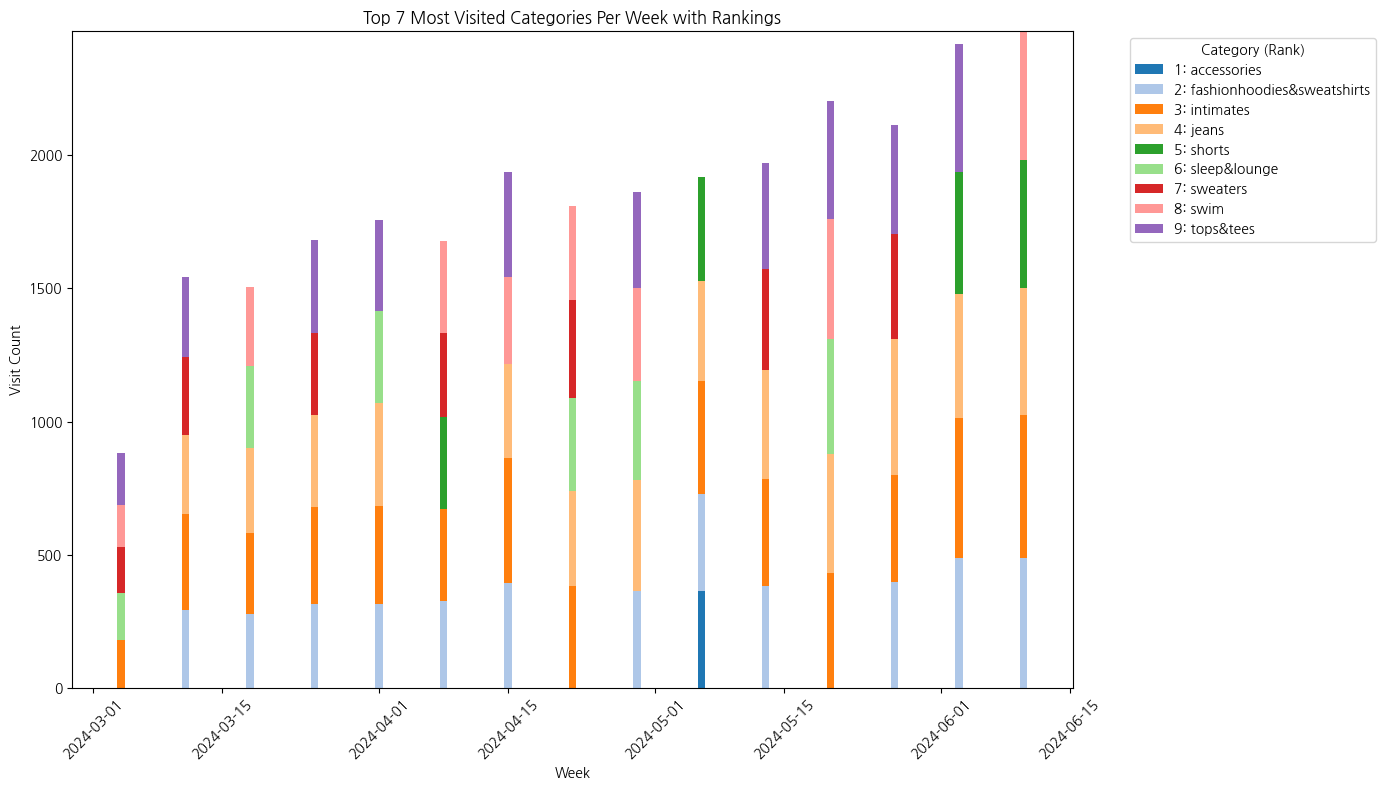

In [11]:
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)
weekly_top7_pivot = weekly_top7_pivot.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.tab20.colors  # Use tab20 colormap for distinct colors
bottom = pd.Series([0] * len(weekly_top7_pivot), index=weekly_top7_pivot.index)

for i, category in enumerate(weekly_top7_pivot.columns):
    ax.bar(weekly_top7_pivot.index, weekly_top7_pivot[category], bottom=bottom, color=colors[i % len(colors)], label=f"{i+1}: {category}")
    bottom += weekly_top7_pivot[category]

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week with Rankings')
plt.xticks(rotation=45)
plt.legend(title='Category (Rank)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Display the results
print("\nTop 7 most visited categories per week:")
print(weekly_top7)

<ipython-input-12-2dcc7793a7cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)



Top 7 most visited categories per week:
             event_created_at                    category  visit_count
0   2024-03-04 00:00:00+00:00                   tops&tees          193
1   2024-03-04 00:00:00+00:00                   intimates          180
2   2024-03-04 00:00:00+00:00                sleep&lounge          178
3   2024-03-04 00:00:00+00:00                    sweaters          170
4   2024-03-04 00:00:00+00:00                        swim          160
5   2024-03-04 00:00:00+00:00             outerwear&coats          156
6   2024-03-04 00:00:00+00:00  fashionhoodies&sweatshirts          138
7   2024-03-11 00:00:00+00:00                   intimates          361
8   2024-03-11 00:00:00+00:00                       jeans          299
9   2024-03-11 00:00:00+00:00                   tops&tees          298
10  2024-03-11 00:00:00+00:00                    sweaters          293
11  2024-03-11 00:00:00+00:00  fashionhoodies&sweatshirts          291
12  2024-03-11 00:00:00+00:00       

<ipython-input-13-bc657a95ae8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


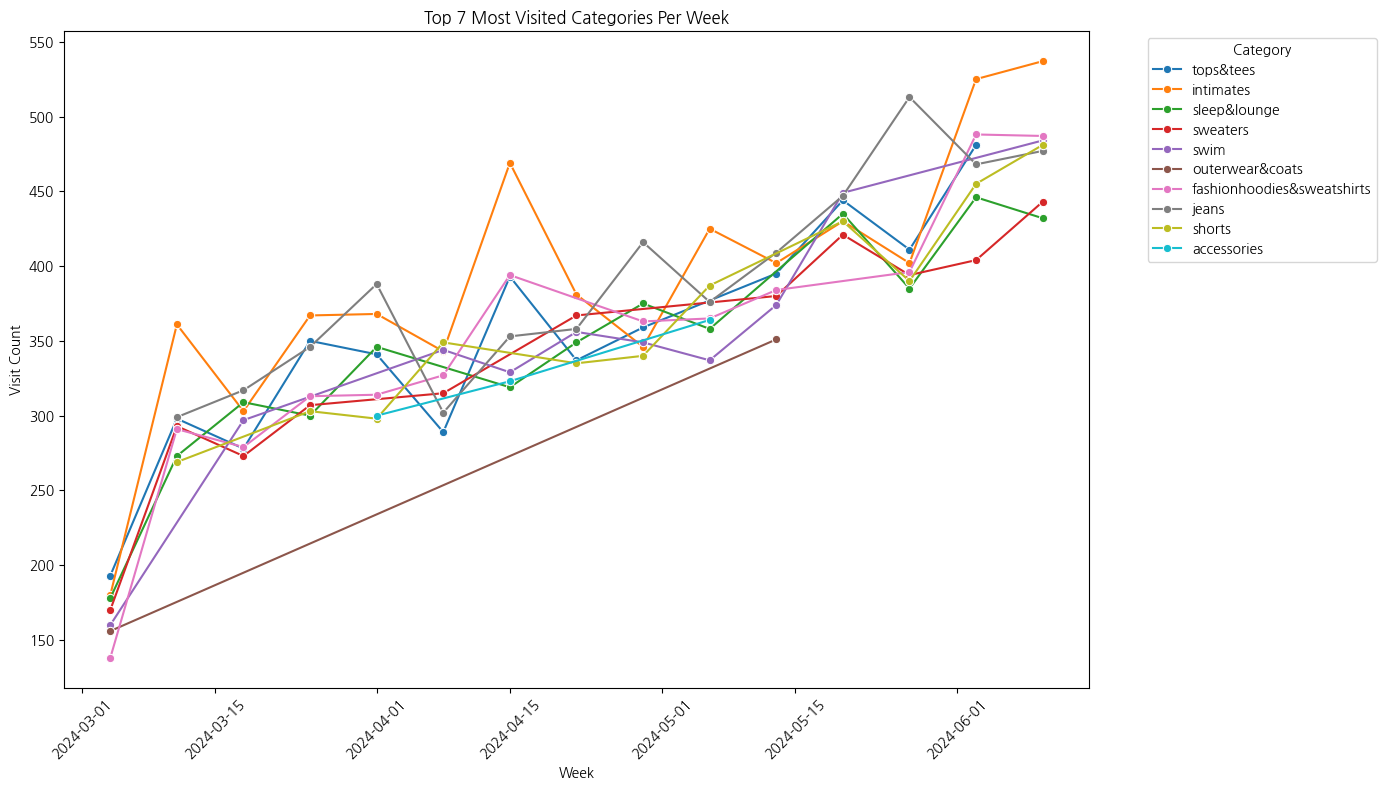

In [13]:
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_top7, x='event_created_at', y='visit_count', hue='category', marker='o')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-14-a55d1d9cf833>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


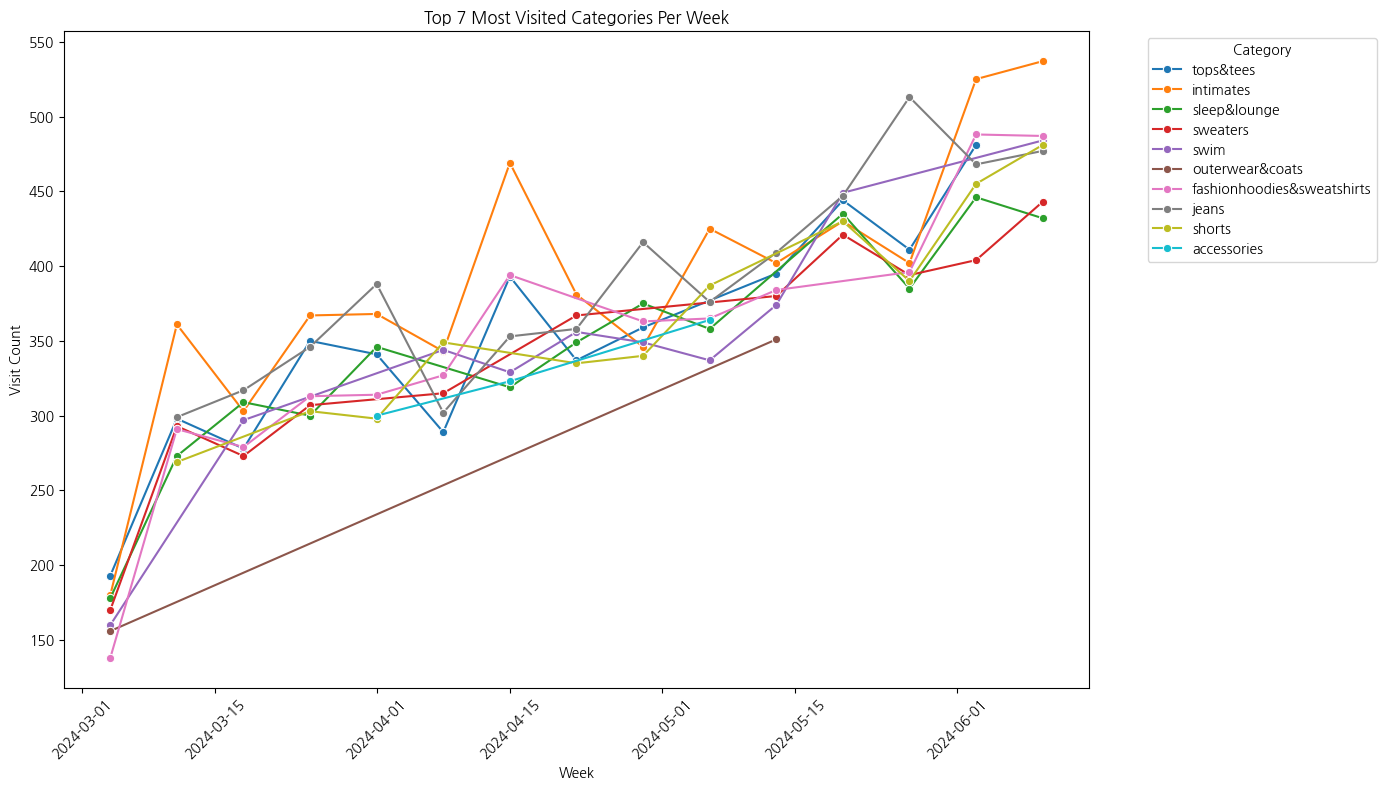

In [14]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_top7, x='event_created_at', y='visit_count', hue='category', marker='o')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-15-d4b175b08467>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


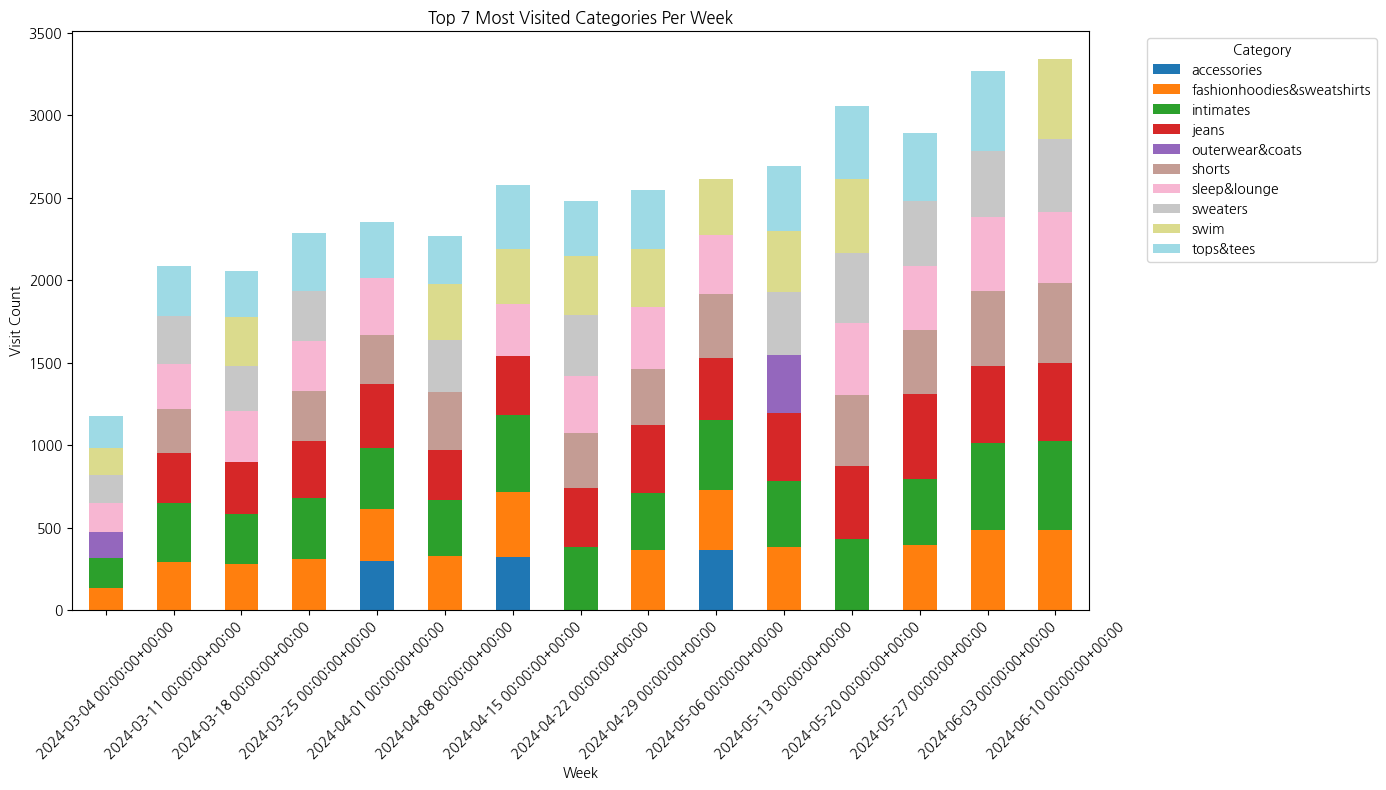

In [15]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Plotting
weekly_top7_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-16-186758087616>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


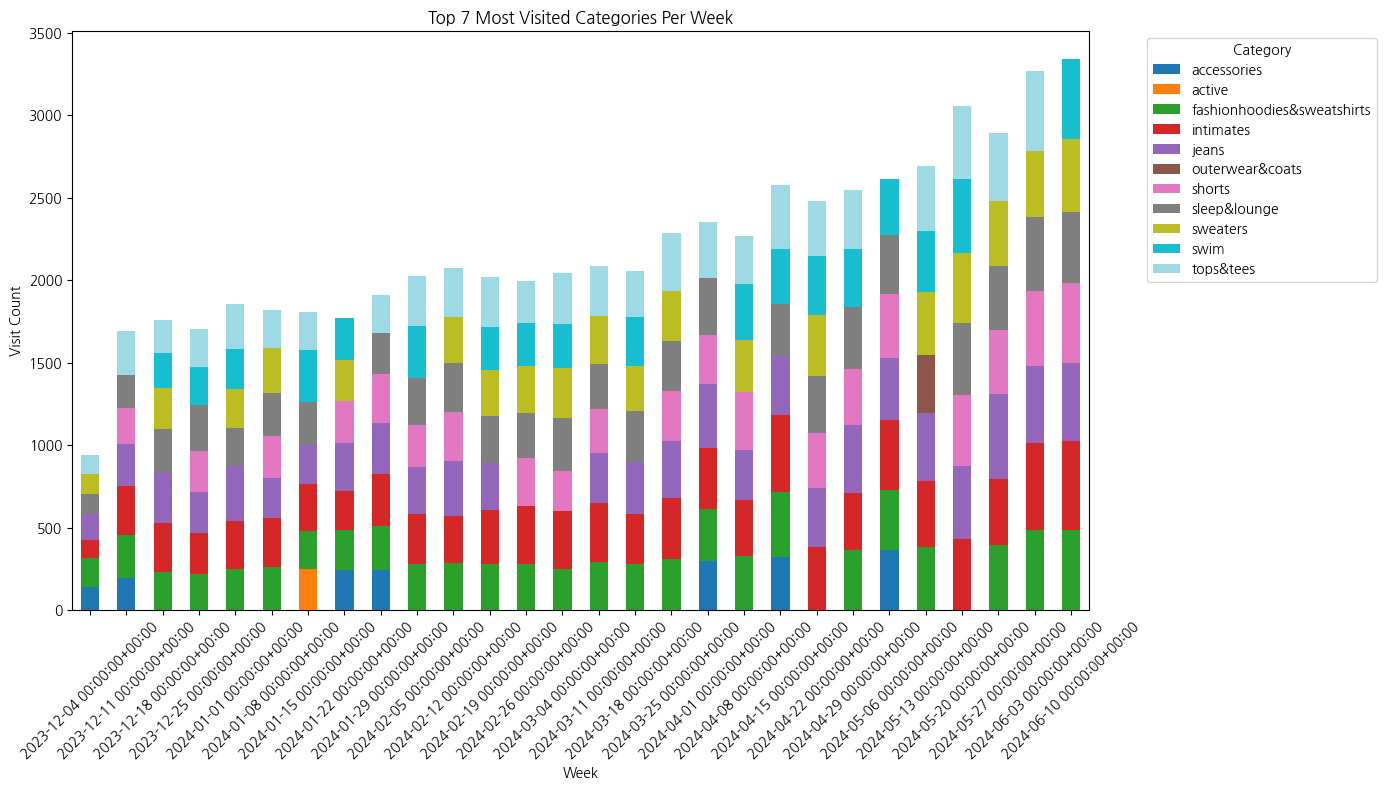

In [16]:
recent_3_months_start = '2023-12-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Plotting
weekly_top7_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-17-fe1d7a8be0f1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


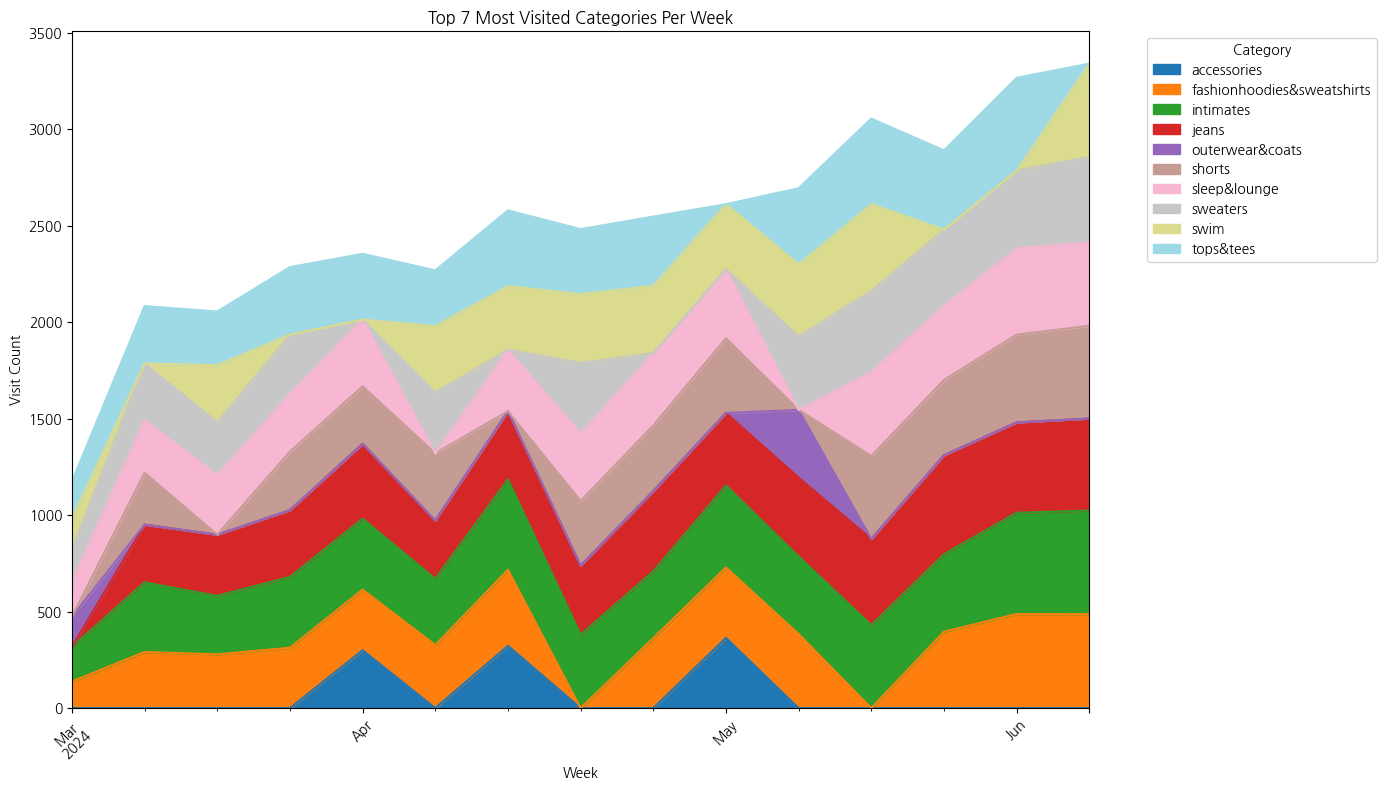

In [17]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Plotting
weekly_top7_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-18-a8163d54d53d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


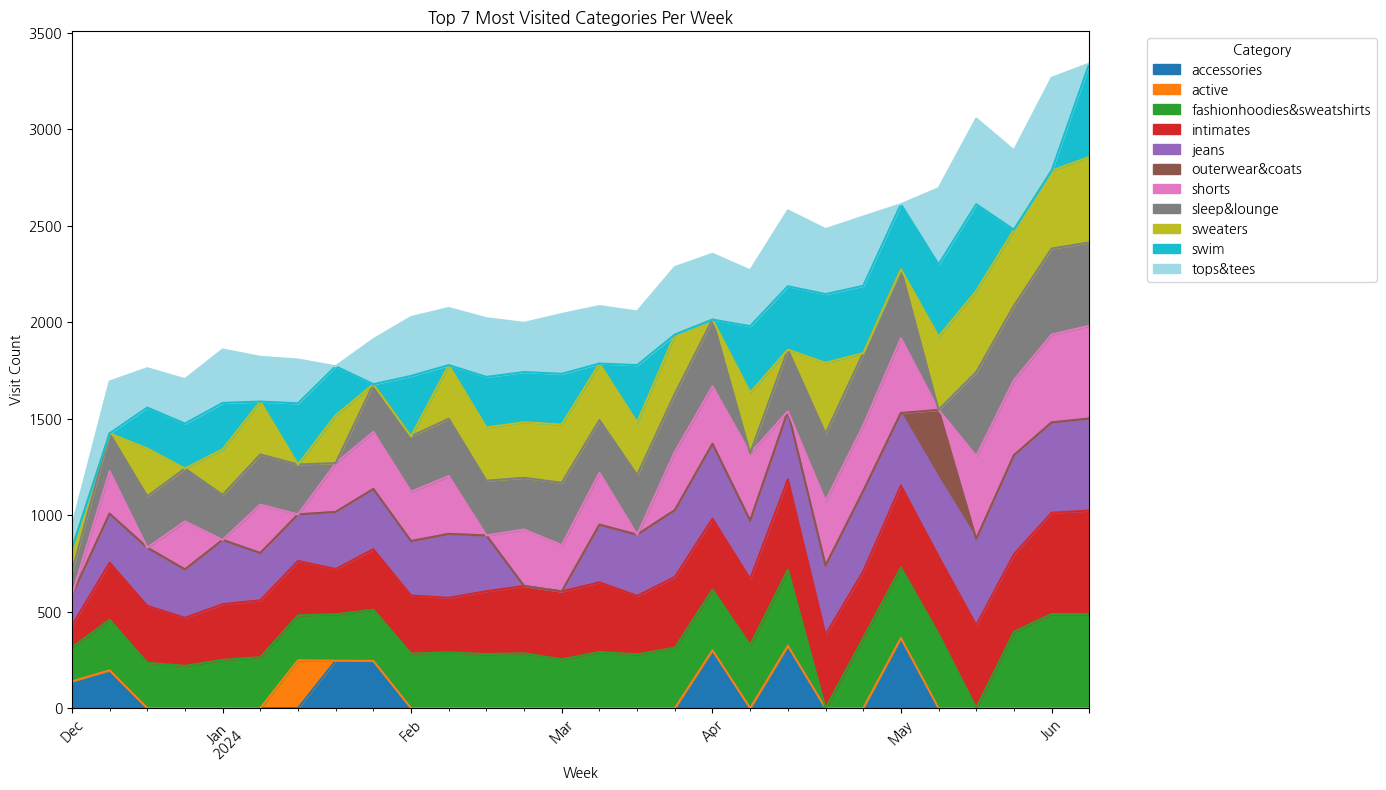

In [18]:
recent_3_months_start = '2023-12-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Plotting
weekly_top7_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-19-1829498a2337>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


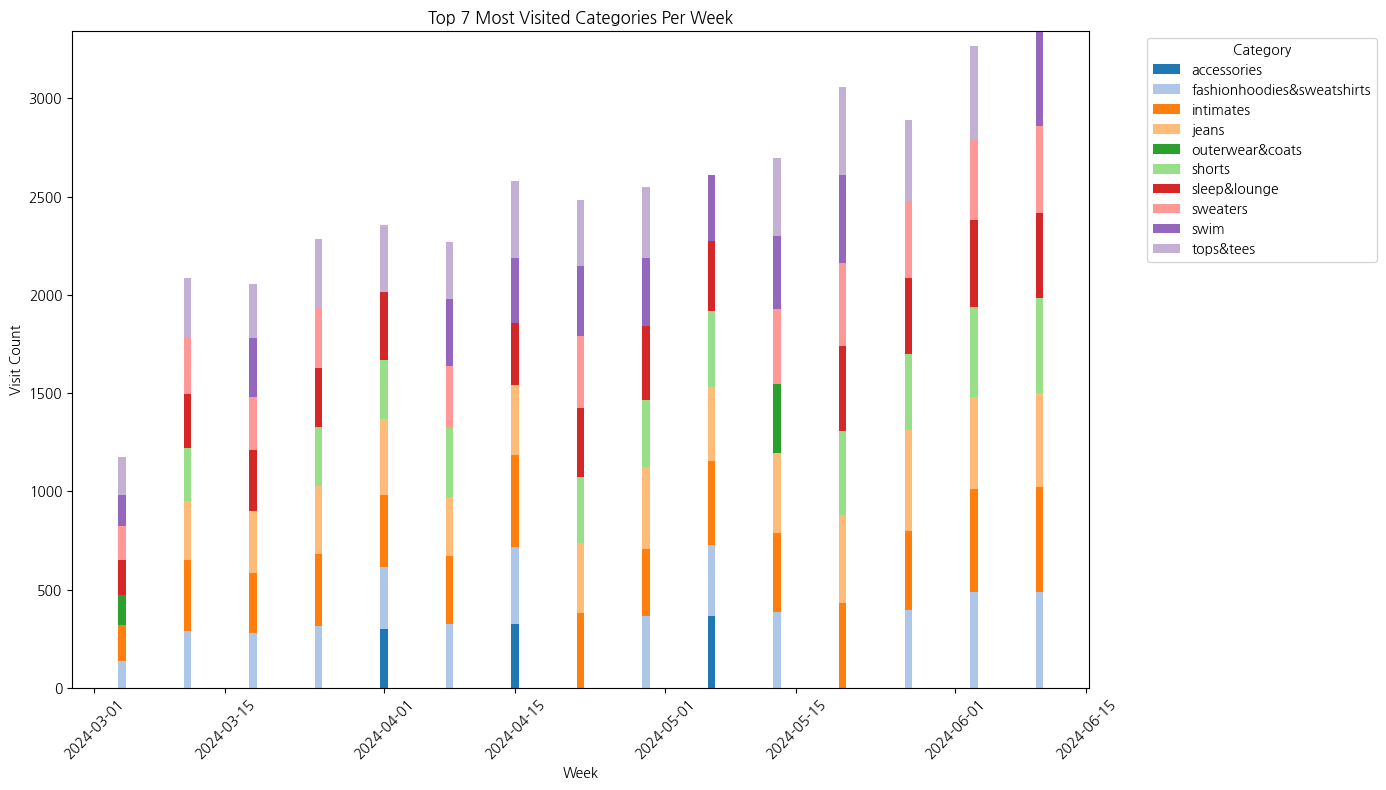

In [19]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(7, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Sort the categories for each week
weekly_top7_pivot = weekly_top7_pivot.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab20.colors  # Use tab20 colormap for distinct colors
bottom = pd.Series([0] * len(weekly_top7_pivot), index=weekly_top7_pivot.index)

for i, category in enumerate(weekly_top7_pivot.columns):
    ax.bar(weekly_top7_pivot.index, weekly_top7_pivot[category], bottom=bottom, color=colors[i % len(colors)], label=category)
    bottom += weekly_top7_pivot[category]

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-20-eb8c1d6155bd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)


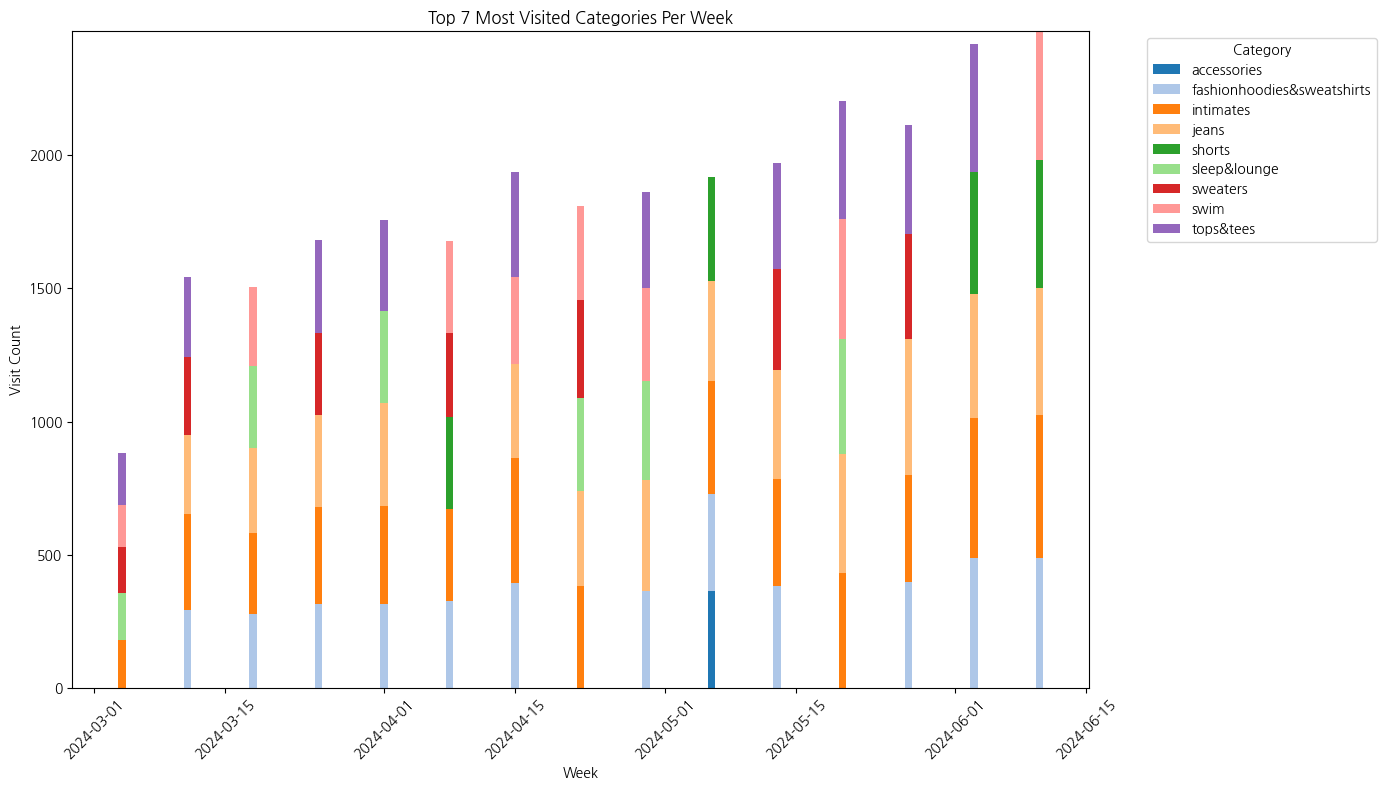

In [20]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end)
]

# Filter for 'department' event type
department_events = recent_3_months_data[recent_3_months_data['event_type'] == 'department']

# Extract the category from the 'uri' column
department_events['category'] = department_events['uri'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else None)

# Drop rows where category extraction failed (if any)
department_events = department_events.dropna(subset=['category'])

# Calculate the most visited categories per week
department_events.set_index('event_created_at', inplace=True)
weekly_visits = department_events.groupby([pd.Grouper(freq='W-MON'), 'category']).size().reset_index(name='visit_count')

# Find the top 7 most visited categories per week
weekly_top7 = weekly_visits.groupby('event_created_at').apply(lambda x: x.nlargest(5, 'visit_count')).reset_index(drop=True)

# Pivot the DataFrame to get categories as columns
weekly_top7_pivot = weekly_top7.pivot(index='event_created_at', columns='category', values='visit_count').fillna(0)

# Sort the categories for each week
weekly_top7_pivot = weekly_top7_pivot.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab20.colors  # Use tab20 colormap for distinct colors
bottom = pd.Series([0] * len(weekly_top7_pivot), index=weekly_top7_pivot.index)

for i, category in enumerate(weekly_top7_pivot.columns):
    ax.bar(weekly_top7_pivot.index, weekly_top7_pivot[category], bottom=bottom, color=colors[i % len(colors)], label=category)
    bottom += weekly_top7_pivot[category]

plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.title('Top 7 Most Visited Categories Per Week')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 20±60대의 고객들의 시간대

<ipython-input-21-c83b6af970c2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour


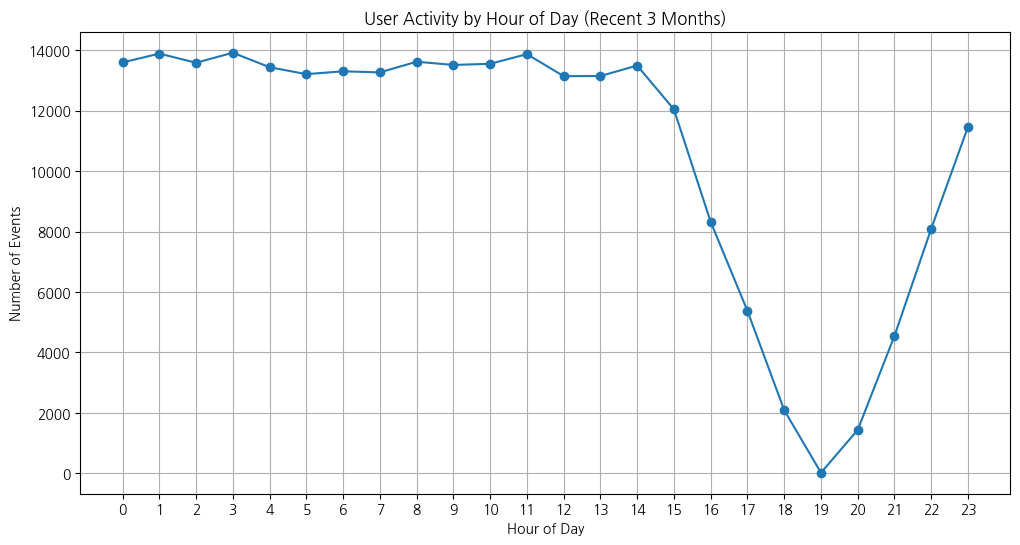

In [21]:

# Ensure 'event_created_at' is in datetime format
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')

# Define the date range for the recent 3 months
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull())
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Group the data by hour and count the number of events
hourly_activity = recent_3_months_data.groupby('hour').size().reset_index(name='event_count')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['hour'], hourly_activity['event_count'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.title('User Activity by Hour of Day (Recent 3 Months)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


<ipython-input-22-f30e0d4a07b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour
<ipython-input-22-f30e0d4a07b9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)


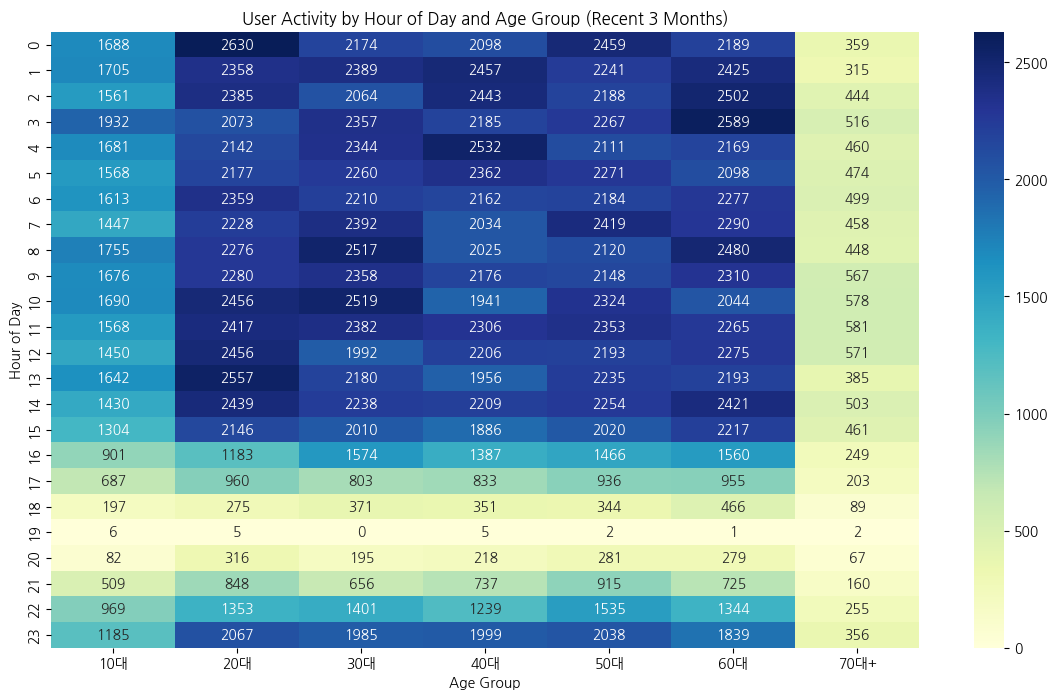

In [22]:
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull())
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대+']

# Categorize ages into bins
recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by hour and age group and count the number of events
hourly_age_activity = recent_3_months_data.groupby(['hour', 'age_group']).size().reset_index(name='event_count')

# Pivot the DataFrame to get a matrix of age groups and hours
hourly_age_pivot = hourly_age_activity.pivot(index='hour', columns='age_group', values='event_count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(hourly_age_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel('Age Group')
plt.ylabel('Hour of Day')
plt.title('User Activity by Hour of Day and Age Group (Recent 3 Months)')
plt.show()

<ipython-input-23-9d0be048381d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour
<ipython-input-23-9d0be048381d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)


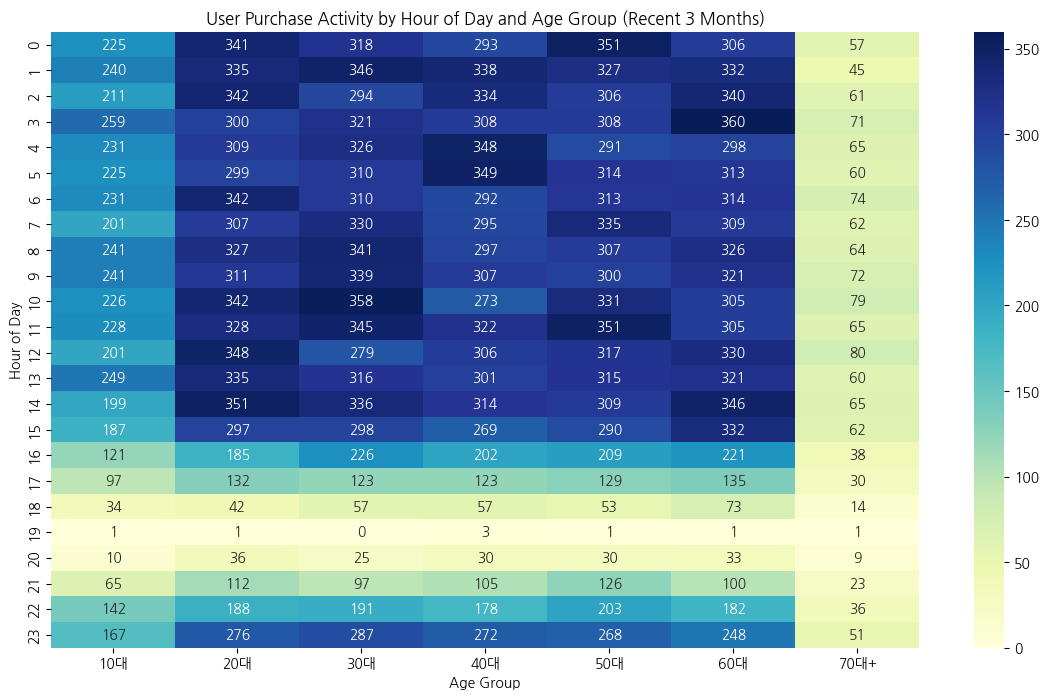

In [23]:
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')

# Define the date range for the recent 3 months
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months and where event_type is 'purchase'
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull()) &
    (merge_event_user['event_type'] == 'purchase')
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대+']

# Categorize ages into bins
recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by hour and age group and count the number of events
hourly_age_activity = recent_3_months_data.groupby(['hour', 'age_group']).size().reset_index(name='event_count')

# Pivot the DataFrame to get a matrix of age groups and hours
hourly_age_pivot = hourly_age_activity.pivot(index='hour', columns='age_group', values='event_count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(hourly_age_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel('Age Group')
plt.ylabel('Hour of Day')
plt.title('User Purchase Activity by Hour of Day and Age Group (Recent 3 Months)')
plt.show()

<ipython-input-50-921fa6635fa8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour
<ipython-input-50-921fa6635fa8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)


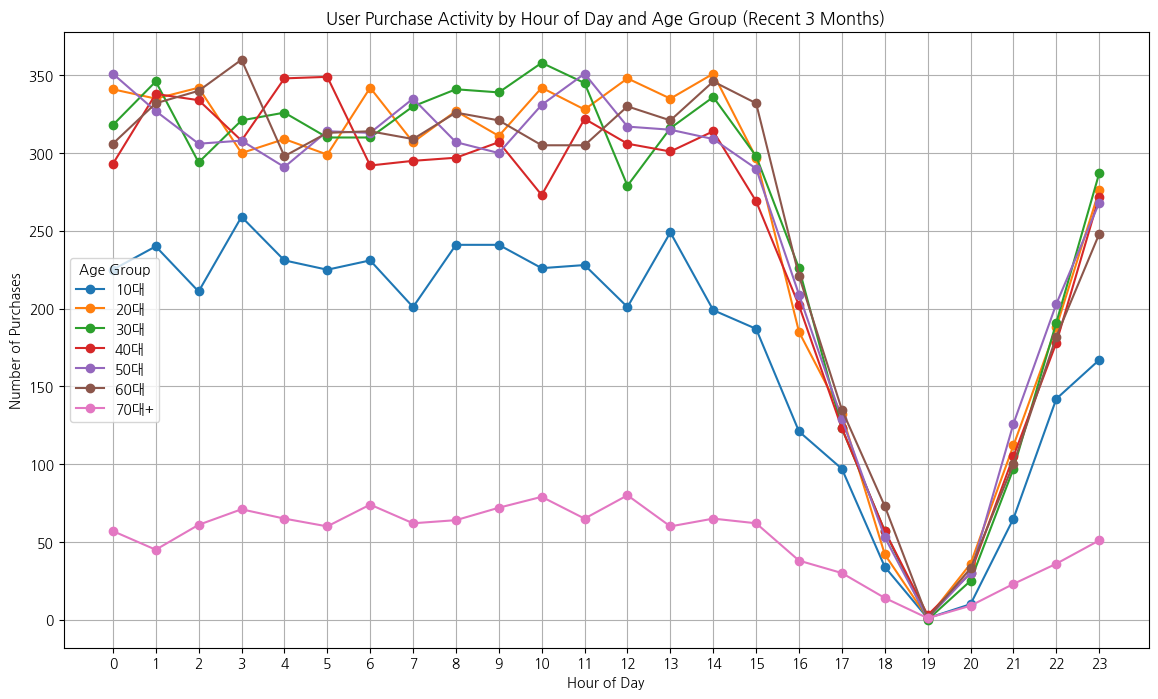

In [50]:
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')

# Define the date range for the recent 3 months
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months and where event_type is 'purchase'
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull()) &
    (merge_event_user['event_type'] == 'purchase')
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대+']

# Categorize ages into bins
recent_3_months_data['age_group'] = pd.cut(recent_3_months_data['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by hour and age group and count the number of events
hourly_age_activity = recent_3_months_data.groupby(['hour', 'age_group']).size().reset_index(name='event_count')

# Plotting
plt.figure(figsize=(14, 8))
for age_group in age_labels:
    group_data = hourly_age_activity[hourly_age_activity['age_group'] == age_group]
    plt.plot(group_data['hour'], group_data['event_count'], marker='o', label=age_group)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.title('User Purchase Activity by Hour of Day and Age Group (Recent 3 Months)')
plt.legend(title='Age Group')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-24-fb8b3a307180>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour


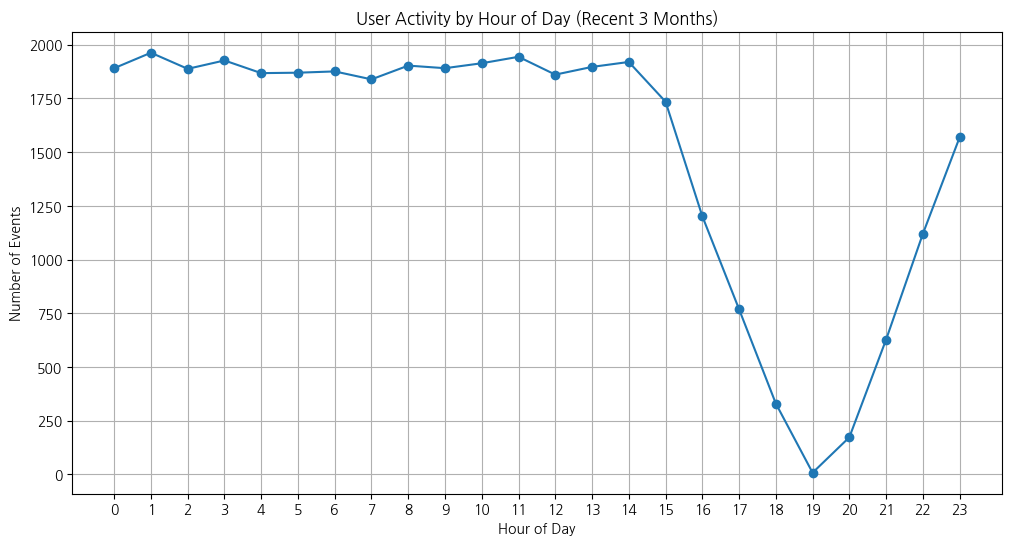

In [24]:

# Ensure 'event_created_at' is in datetime format
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce')

# Define the date range for the recent 3 months
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull()&  (merge_event_user['event_type'] == 'purchase'))
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Group the data by hour and count the number of events
hourly_activity = recent_3_months_data.groupby('hour').size().reset_index(name='event_count')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['hour'], hourly_activity['event_count'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.title('User Activity by Hour of Day (Recent 3 Months)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-25-05344883e578>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour


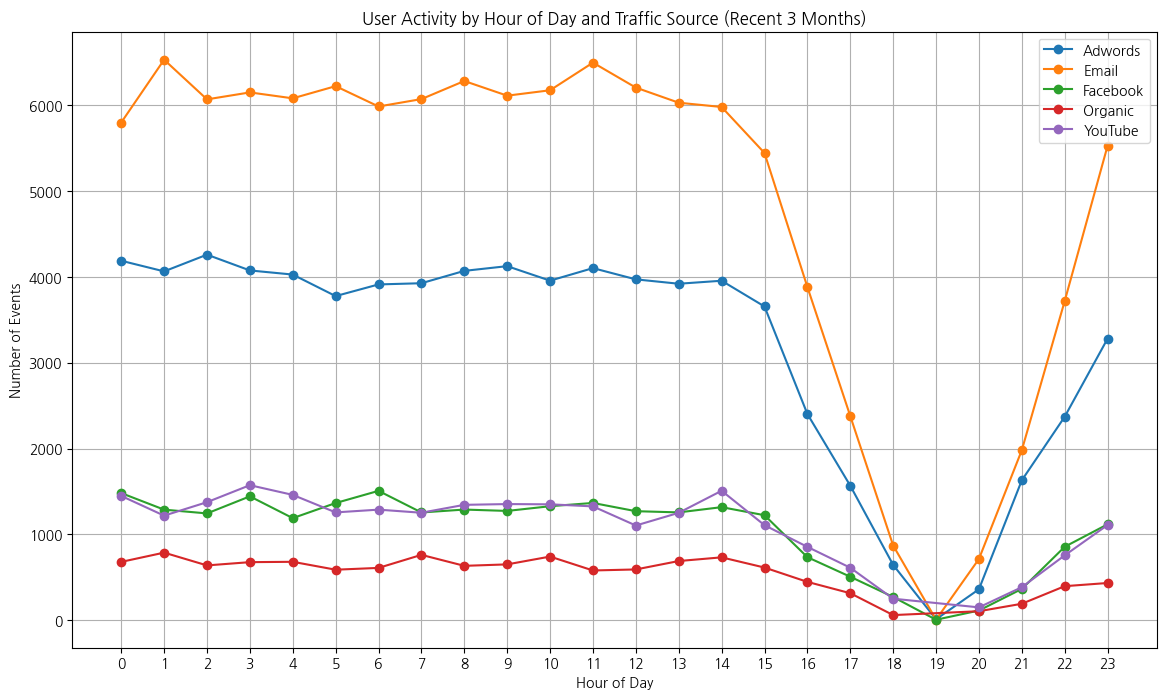

In [25]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months and where user_id is not null
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull())
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Group the data by hour and traffic_source, count the number of events
hourly_traffic_activity = recent_3_months_data.groupby(['hour', 'event_traffic_source']).size().reset_index(name='event_count')

# Visualize the results for each traffic_source
plt.figure(figsize=(14, 8))
for traffic_source, group_data in hourly_traffic_activity.groupby('event_traffic_source'):
    plt.plot(group_data['hour'], group_data['event_count'], marker='o', label=traffic_source)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.title('User Activity by Hour of Day and Traffic Source (Recent 3 Months)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-48-1084781a91a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour


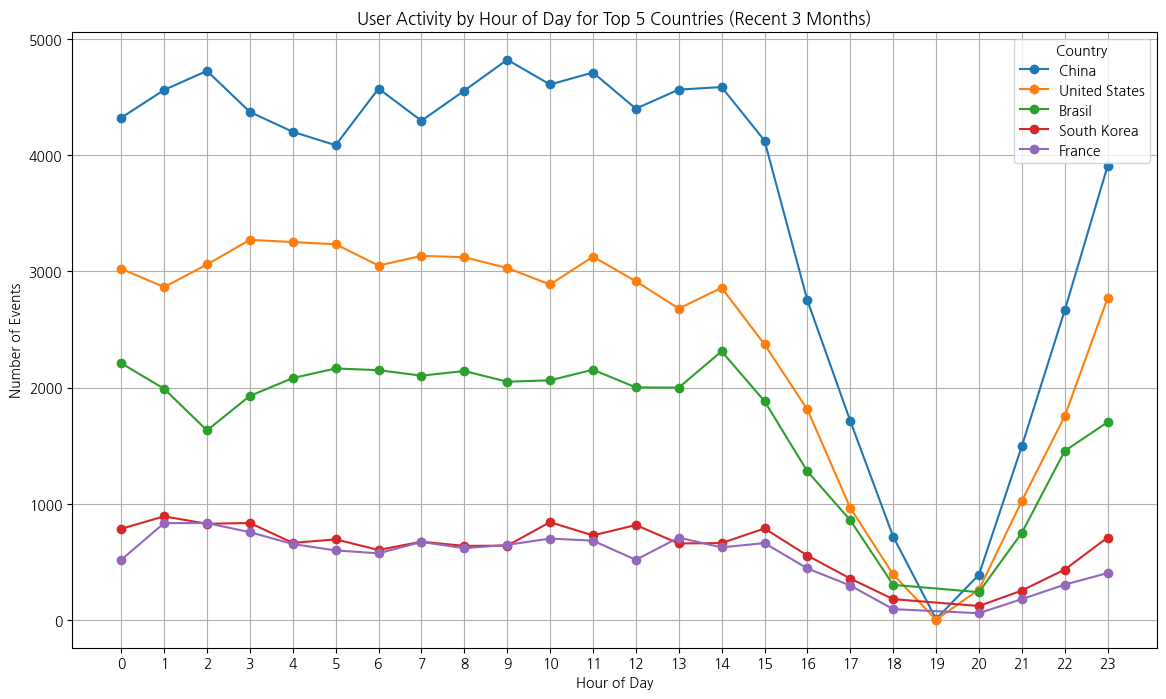

In [48]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months and where user_id is not null
recent_3_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_3_months_start) &
    (merge_event_user['event_created_at'] <= recent_3_months_end) &
    (merge_event_user['user_id'].notnull())
]

# Extract the hour from the event timestamps
recent_3_months_data['hour'] = recent_3_months_data['event_created_at'].dt.hour

# Get the top 5 countries by event count
top_5_countries = recent_3_months_data['country'].value_counts().nlargest(5).index

# Filter data for the top 5 countries
recent_3_months_data = recent_3_months_data[recent_3_months_data['country'].isin(top_5_countries)]

# Group the data by hour and country, count the number of events
hourly_traffic_activity = recent_3_months_data.groupby(['hour', 'country']).size().reset_index(name='event_count')

# Plot the results for each country
plt.figure(figsize=(14, 8))
for country in top_5_countries:
    country_data = hourly_traffic_activity[hourly_traffic_activity['country'] == country]
    plt.plot(country_data['hour'], country_data['event_count'], marker='o', label=country)

# Customize the plot
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.title('User Activity by Hour of Day for Top 5 Countries (Recent 3 Months)')
plt.legend(title='Country')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [26]:
# 총 매출량 예측
# 총 WAU 예측
# 총 주문 수 예측
# 전환율이 얼마나 되어야 매출량을 달성할 수 있을까?
merge_event_user['event_created_at'] = pd.to_datetime(merge_event_user['event_created_at'], errors='coerce').dt.tz_localize(None)
order_items['created_at'] = pd.to_datetime(order_items['created_at'], errors='coerce').dt.tz_localize(None)



In [27]:
recent_6_months_start = '2023-12-01'
recent_6_months_end = '2024-06-13'

# Filter the data for the recent 6 months
recent_6_months_data = merge_event_user[
    (merge_event_user['event_created_at'] >= recent_6_months_start) &
    (merge_event_user['event_created_at'] <= recent_6_months_end) &
    (merge_event_user['user_id'].notnull())
]

# Filter order_items data for the recent 6 months
recent_6_months_orders = order_items[
    (order_items['created_at'] >= recent_6_months_start) &
    (order_items['created_at'] <= recent_6_months_end)
]

In [28]:
#총 매출 예측
!pip install prophet

import prophet
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/x58np89m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/k4reak79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43015', 'data', 'file=/tmp/tmpcz69o47v/x58np89m.json', 'init=/tmp/tmpcz69o47v/k4reak79.json', 'output', 'file=/tmp/tmpcz69o47v/prophet_modelkvls7_us/prophet_model-20240701120645.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:45 - cmdstanpy - INFO - Chain [1] start processing
I

           ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2023-12-04   77375.795003   35621.783787  116447.293803   77375.795003   
1  2023-12-11   80352.396837   40780.009299  121878.104532   80352.396837   
2  2023-12-18   83328.998670   40390.176490  123022.812826   83328.998670   
3  2023-12-25   86305.600504   44363.518481  127455.894779   86305.600504   
4  2024-01-01   89282.202336   50704.278155  133008.072981   89282.202336   
5  2024-01-08   92258.804169   52635.834184  133421.589055   92258.804169   
6  2024-01-15   95235.406002   53388.939037  139405.678622   95235.406002   
7  2024-01-22   98212.007835   57477.128691  136332.720331   98212.007835   
8  2024-01-29  101188.609667   61424.126782  141701.823824  101188.609667   
9  2024-02-05  104165.211500   65040.709374  143277.143071  104165.211500   
10 2024-02-12  107141.813334   67855.548814  149002.592981  107141.813334   
11 2024-02-19  110118.415168   65496.377984  153259.158684  110118.415168   

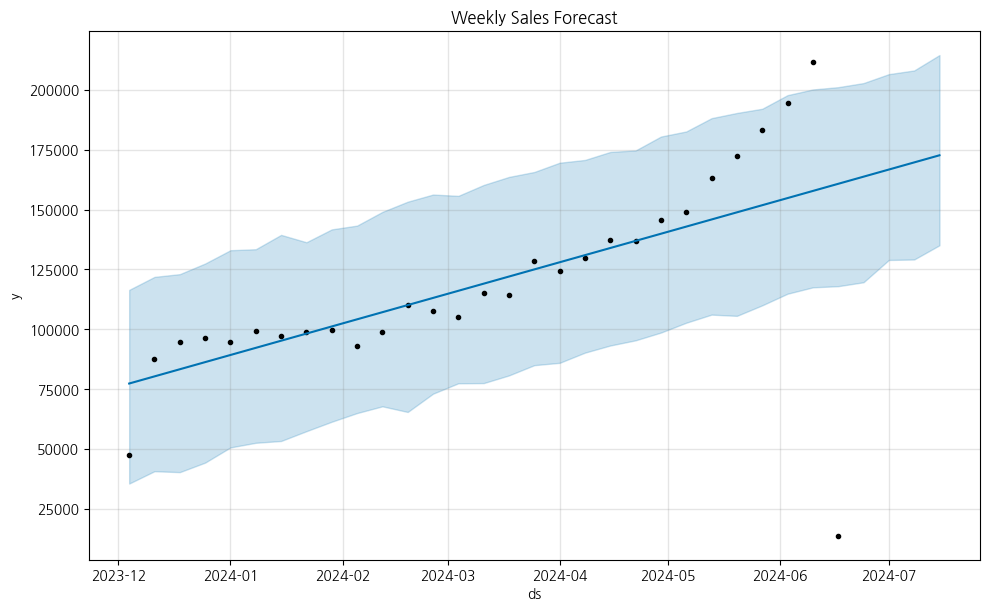

In [29]:
sales_data = recent_6_months_orders.set_index('created_at').resample('W-MON')['sale_price'].sum().reset_index()
sales_data.columns = ['ds', 'y']

#sales_data['time'].dt.tz_localize(None)
# Create and fit the Prophet model for sales
sales_model = Prophet()
sales_model.fit(sales_data)

# Predict the next 4 weeks
future_sales = sales_model.make_future_dataframe(periods=4, freq='W-MON')
forecast_sales = sales_model.predict(future_sales)
print(forecast_sales)
# Plot the forecast
sales_model.plot(forecast_sales)
plt.title('Weekly Sales Forecast')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/qmftrvv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/kqq2jrr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55638', 'data', 'file=/tmp/tmpcz69o47v/qmftrvv4.json', 'init=/tmp/tmpcz69o47v/kqq2jrr1.json', 'output', 'file=/tmp/tmpcz69o47v/prophet_modelcojtzxa8/prophet_model-20240701120651.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:51 - cmdstanpy - INFO - Chain [1] start processing
I

           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2023-12-04  1513.177820   743.548411  2200.431930  1513.177820   
1  2023-12-11  1567.052253   811.239042  2310.800558  1567.052253   
2  2023-12-18  1620.926686   885.347029  2346.354004  1620.926686   
3  2023-12-25  1674.801119   880.487652  2381.779449  1674.801119   
4  2024-01-01  1728.675551  1027.189089  2549.102349  1728.675551   
5  2024-01-08  1782.549984  1016.519502  2512.931829  1782.549984   
6  2024-01-15  1836.424417  1154.556263  2607.182830  1836.424417   
7  2024-01-22  1890.298850  1135.089863  2606.685322  1890.298850   
8  2024-01-29  1944.173283  1258.138445  2736.296970  1944.173283   
9  2024-02-05  1998.047716  1250.707234  2712.847411  1998.047716   
10 2024-02-12  2051.922148  1351.199243  2766.034769  2051.922148   
11 2024-02-19  2105.796581  1413.216382  2884.104398  2105.796581   
12 2024-02-26  2159.671014  1398.599201  2893.979734  2159.671014   
13 2024-03-04  2213.545447  1462.1

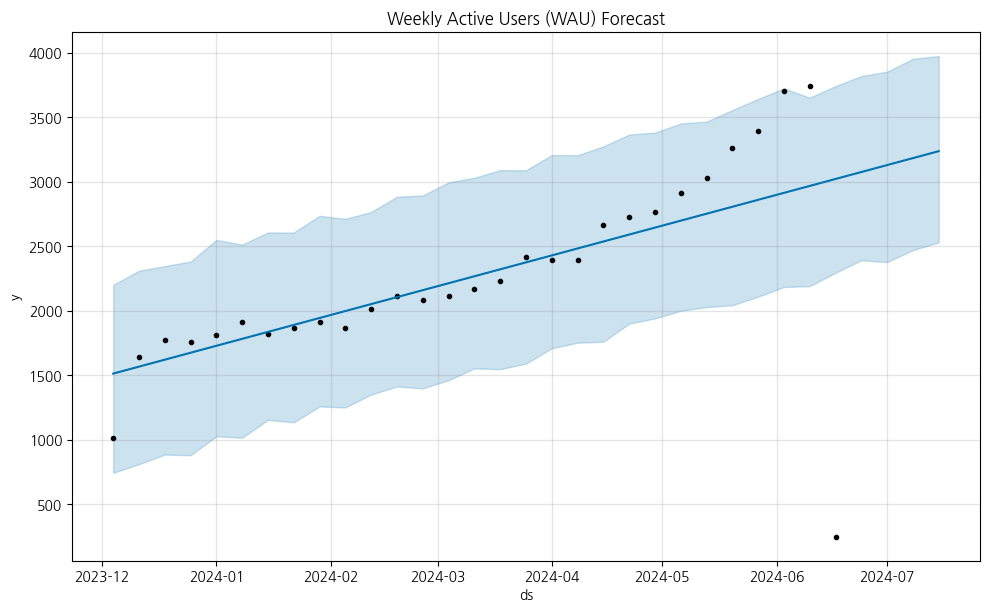

In [30]:
#WAU 예측
wau_data = recent_6_months_data.set_index('event_created_at').resample('W-MON')['session_id'].nunique().reset_index()
wau_data.columns = ['ds', 'y']

# Create and fit the Prophet model for WAU
wau_model = Prophet()
wau_model.fit(wau_data)

# Predict the next 4 weeks
future_wau = wau_model.make_future_dataframe(periods=4, freq='W-MON')
forecast_wau = wau_model.predict(future_wau)
print(forecast_wau)
# Plot the forecast
wau_model.plot(forecast_wau)
plt.title('Weekly Active Users (WAU) Forecast')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/hav9nq_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz69o47v/pcl1iiha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37718', 'data', 'file=/tmp/tmpcz69o47v/hav9nq_i.json', 'init=/tmp/tmpcz69o47v/pcl1iiha.json', 'output', 'file=/tmp/tmpcz69o47v/prophet_modelwbh6ja1q/prophet_model-20240701120652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:52 - cmdstanpy - INFO - Chain [1] start processing
I

           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2023-12-04   971.733270   497.344376  1488.873485   971.733270   
1  2023-12-11  1007.565201   522.432630  1466.490495  1007.565201   
2  2023-12-18  1043.397132   536.688350  1532.389755  1043.397132   
3  2023-12-25  1079.229063   566.299674  1599.689713  1079.229063   
4  2024-01-01  1115.060994   660.363023  1587.838758  1115.060994   
5  2024-01-08  1150.892925   661.079379  1645.702776  1150.892925   
6  2024-01-15  1186.724857   675.777811  1665.252294  1186.724857   
7  2024-01-22  1222.556788   684.526142  1690.995626  1222.556788   
8  2024-01-29  1258.388719   772.221665  1724.620374  1258.388719   
9  2024-02-05  1294.220650   820.759280  1802.743143  1294.220650   
10 2024-02-12  1330.052581   815.106215  1822.952218  1330.052581   
11 2024-02-19  1365.884512   852.124314  1879.261413  1365.884512   
12 2024-02-26  1401.716443   919.762985  1910.641406  1401.716443   
13 2024-03-04  1437.548374   966.3

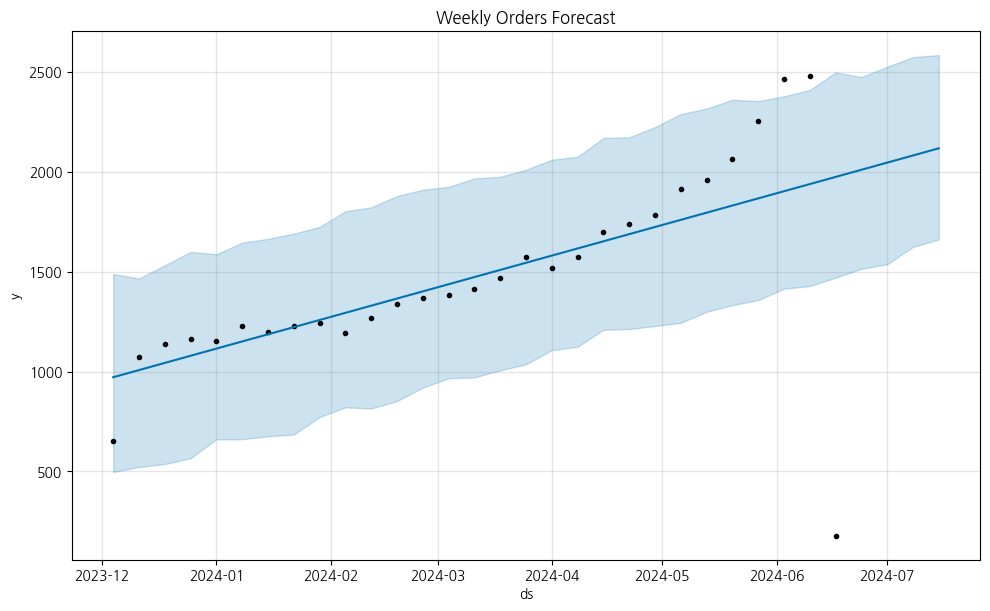

In [31]:
#주문수 예측
order_data = recent_6_months_orders.set_index('created_at').resample('W-MON')['order_id'].nunique().reset_index()
order_data.columns = ['ds', 'y']

# Create and fit the Prophet model for orders
order_model = Prophet()
order_model.fit(order_data)

# Predict the next 4 weeks
future_orders = order_model.make_future_dataframe(periods=4, freq='W-MON')
forecast_orders = order_model.predict(future_orders)
print(forecast_orders)
# Plot the forecast
order_model.plot(forecast_orders)
plt.title('Weekly Orders Forecast')
plt.show()

In [32]:
# Define current traffic and sales target
current_traffic = merge_event_user[(merge_event_user['event_created_at'] >= recent_3_months_start) &
                                   (merge_event_user['event_created_at'] <= recent_3_months_end)].shape[0]
sales_target = 100000  # Example target sales

# Average order value (AOV)
average_order_value = recent_6_months_orders['sale_price'].mean()

# Required number of orders to meet the sales target
required_orders = sales_target / average_order_value

# Required conversion rate
required_conversion_rate = required_orders / current_traffic

print(f"Required Conversion Rate: {required_conversion_rate:.2%}")


Required Conversion Rate: 0.53%


In [33]:
order_items.nunique()

id                   180907
order_id             124776
user_id               79990
product_id            29055
inventory_item_id    180907
status                    5
created_at           176105
shipped_at            78842
delivered_at          43021
returned_at           12381
sale_price             4187
dtype: int64

In [34]:
events.nunique()

id                 2422922
user_id              79990
sequence_number         13
session_id          680907
created_at         2117945
ip_address          680844
city                  8774
state                  231
postal_code          17318
browser                  5
traffic_source           5
uri                  35530
event_type               6
dtype: int64

In [35]:
weekly_visitors = recent_3_months_data.set_index('event_created_at').resample('W-MON')['user_id'].nunique().reset_index()
weekly_visitors.columns = ['week', 'unique_visitors']

# Calculate the average number of weekly visitors over the last 3 months
average_weekly_visitors = weekly_visitors['unique_visitors'].mean()

print(f"지난 3개월간 주당 평균 방문자수: {average_weekly_visitors:.2f}")

지난 3개월간 주당 평균 방문자수: 1693.62


In [36]:
weekly_visitors = recent_3_months_data.set_index('event_created_at').resample('W-MON')['session_id'].nunique().reset_index()
weekly_visitors.columns = ['week', 'unique_visitors']

# Calculate the average number of weekly visitors over the last 3 months
average_weekly_visitors = weekly_visitors['unique_visitors'].mean()

print(f"지난 3개월간 주당 평균 방문자수: {average_weekly_visitors:.2f}")

지난 3개월간 주당 평균 방문자수: 2588.81


In [37]:
# Calculate weekly unique session_ids over the last 3 months
weekly_sessions = recent_3_months_data.set_index('event_created_at').resample('W-MON')['session_id'].nunique().reset_index()
weekly_sessions.columns = ['week', 'unique_sessions']

# Calculate the average number of weekly sessions over the last 3 months
average_weekly_sessions = weekly_sessions['unique_sessions'].mean()

print(f"지난 3개월간 주당 평균 방문자수 (고유 session 기준): {average_weekly_sessions:.2f}")


지난 3개월간 주당 평균 방문자수 (고유 session 기준): 2588.81


In [38]:
recent_3_months_orders = order_items[
    (order_items['created_at'] >= recent_3_months_start) &
    (order_items['created_at'] <= recent_3_months_end)
]
weekly_sales = recent_3_months_orders.set_index('created_at').resample('W-MON')['sale_price'].sum().reset_index()
weekly_sales.columns = ['week', 'total_sales']

# Calculate the average weekly sales over the last 3 months
average_weekly_sales = weekly_sales['total_sales'].mean()

print(f"지난 3개월간 주당 평균 구매액: {average_weekly_sales:.2f} 원")


지난 3개월간 주당 평균 구매액: 136304.15 원


In [39]:
recent_3_months_orders = order_items[
    (order_items['created_at'] >= recent_3_months_start) &
    (order_items['created_at'] <= recent_3_months_end)
]
weekly_orders = recent_3_months_orders.set_index('created_at').resample('W-MON')['order_id'].count().reset_index()
weekly_orders.columns = ['week', 'order_count']

# Calculate the average weekly order count over the last 3 months
average_weekly_orders = weekly_orders['order_count'].mean()

print(f"지난 3개월간 주당 평균 주문수: {average_weekly_orders:.2f}")

지난 3개월간 주당 평균 주문수: 2249.12


In [40]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter the data for the recent 3 months and 'purchase' event type
recent_3_months_data = events[
    (events['created_at'] >= recent_3_months_start) &
    (events['created_at'] <= recent_3_months_end) &
    (events['event_type'] == 'purchase')
]

# Calculate weekly order counts over the last 3 months
weekly_orders = recent_3_months_data.set_index('created_at').resample('W-MON')['session_id'].count().reset_index()
weekly_orders.columns = ['week', 'order_count']

# Calculate the average weekly order count over the last 3 months
average_weekly_orders = weekly_orders['order_count'].mean()

print(f"지난 3개월간 주당 평균 주문수: {average_weekly_orders:.2f}")


지난 3개월간 주당 평균 주문수: 2249.12


In [41]:
recent_6_months_start = '2023-12-01'
recent_6_months_end = '2024-06-13'

recent_6_months = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)]
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]

home_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'home')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'product'
product_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'product')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'department'
department_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'department')]['session_id'].drop_duplicates()

# Calculate total sessions, purchase sessions, and churn rate
total_sessions = recent_6_months['session_id'].nunique()
purchase_sessions = recent_6_months_data.loc[recent_6_months_data['event_type'] == 'purchase']['session_id'].nunique()

# Churn rate calculation
churn_rate = ( (purchase_sessions / total_sessions)* 100)

# Output the results
print(f"Total Sessions: {total_sessions}")
print(f"Purchase Sessions: {purchase_sessions}")
print(f"Purchase Rate (%): {churn_rate}")



Total Sessions: 105550
Purchase Sessions: 57170
Purchase Rate (%): 54.16390336333491


In [42]:
recent_6_months_start = '2023-06-01'
recent_6_months_end = '2024-06-13'

recent_6_months = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)]
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]

home_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'home')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'product'
product_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'product')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'department'
department_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'department')]['session_id'].drop_duplicates()

# Calculate total sessions, purchase sessions, and churn rate
total_sessions = recent_6_months['session_id'].nunique()
purchase_sessions = recent_6_months_data.loc[recent_6_months_data['event_type'] == 'purchase']['session_id'].nunique()

# Churn rate calculation
churn_rate = ( (purchase_sessions / total_sessions)* 100)

# Output the results
print(f"Total Sessions: {total_sessions}")
print(f"Purchase Sessions: {purchase_sessions}")
print(f"Purchase Rate (%): {churn_rate}")

Total Sessions: 183658
Purchase Sessions: 89176
Purchase Rate (%): 48.55546722712869


In [43]:
recent_6_months_end = '2024-06-13'

recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].isnull())]

home_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'home')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'product'
product_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'product')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'department'
department_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'department')]['session_id'].drop_duplicates()

# Calculate total sessions, purchase sessions, and churn rate
total_sessions = recent_6_months_data['session_id'].nunique()
purchase_sessions = recent_6_months_data.loc[recent_6_months_data['event_type'] == 'purchase']['session_id'].nunique()

# Churn rate calculation
churn_rate = ( (purchase_sessions / total_sessions)* 100)

# Output the results
print(f"Total Sessions: {total_sessions}")
print(f"Purchase Sessions: {purchase_sessions}")
print(f"Purchase Rate (%): {churn_rate}")

Total Sessions: 94451
Purchase Sessions: 0
Purchase Rate (%): 0.0


In [44]:
recent_6_months_start = '2023-06-01'
recent_6_months_end = '2024-06-13'
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]
weekly_visitors = recent_3_months_data.set_index('event_created_at').resample('D')['user_id'].nunique().reset_index()
weekly_visitors.columns = ['week', 'unique_visitors']

# Calculate the average number of weekly visitors over the last 3 months
average_weekly_visitors = weekly_visitors['unique_visitors'].mean()

print(f"최근 1년간 평균 방문자수: {average_weekly_visitors:.2f}")

KeyError: "None of ['event_created_at'] are in the columns"

In [ ]:
recent_6_months_start = '2023-06-01'
recent_6_months_end = '2024-06-13'
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]
recent_3_months_orders = order_items[
    (order_items['created_at'] >= recent_6_months_start) &
    (order_items['created_at'] <= recent_6_months_end)
]
weekly_sales = recent_3_months_orders.set_index('created_at').resample('D')['sale_price'].sum().reset_index()
weekly_sales.columns = ['week', 'total_sales']

# Calculate the average weekly sales over the last 3 months
average_weekly_sales = weekly_sales['total_sales'].mean()

print(f"최근1년간 평균 구매액: {average_weekly_sales:.2f} 원")


In [ ]:
recent_6_months_start = '2023-12-01'
recent_6_months_end = '2024-06-13'
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]
weekly_visitors = recent_3_months_data.set_index('event_created_at').resample('W-Mon')['user_id'].nunique().reset_index()
weekly_visitors.columns = ['week', 'unique_visitors']

# Calculate the average number of weekly visitors over the last 3 months
average_weekly_visitors = weekly_visitors['unique_visitors'].mean()

print(f"최근 1년간 평균 방문자수: {average_weekly_visitors:.2f}")

In [ ]:
recent_6_months_start = '2023-12-01'
recent_6_months_end = '2024-06-13'
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]
recent_3_months_orders = order_items[
    (order_items['created_at'] >= recent_6_months_start) &
    (order_items['created_at'] <= recent_6_months_end)
]
weekly_sales = recent_3_months_orders.set_index('created_at').resample('W-Mon')['sale_price'].sum().reset_index()
weekly_sales.columns = ['week', 'total_sales']

# Calculate the average weekly sales over the last 3 months
average_weekly_sales = weekly_sales['total_sales'].mean()

print(f"최근1년간 평균 구매액: {average_weekly_sales:.2f} 원")

In [ ]:
recent_6_months_start = '2023-12-01'
recent_6_months_end = '2024-06-13'

recent_6_months = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)]
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]

home_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'home')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'product'
product_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'product')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'department'
department_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'department')]['session_id'].drop_duplicates()

# Calculate total sessions, purchase sessions, and churn rate
total_sessions = recent_6_months['session_id'].nunique()
purchase_sessions = recent_6_months_data.loc[recent_6_months_data['event_type'] == 'purchase']['session_id'].nunique()

# Churn rate calculation
churn_rate = ( (purchase_sessions / total_sessions)* 100)

# Output the results
print(f"Total Sessions: {total_sessions}")
print(f"Purchase Sessions: {purchase_sessions}")
print(f"Purchase Rate (%): {churn_rate}")

In [ ]:
recent_6_months_start = '2024-03-01'
recent_6_months_end = '2024-06-13'

recent_6_months = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)]
recent_6_months_data = events[(events['created_at'] >= recent_6_months_start) & (events['created_at'] <= recent_6_months_end)&(events['user_id'].notnull())]

home_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'home')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'product'
product_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'product')]['session_id'].drop_duplicates()

# Filter for sessions where sequence_number is 1 and event_type is 'department'
department_sessions = recent_6_months_data.loc[(recent_6_months_data['sequence_number'] == 1) & (recent_6_months_data['event_type'] == 'department')]['session_id'].drop_duplicates()

# Calculate total sessions, purchase sessions, and churn rate
total_sessions = recent_6_months['session_id'].nunique()
purchase_sessions = recent_6_months_data.loc[recent_6_months_data['event_type'] == 'purchase']['session_id'].nunique()

# Churn rate calculation
churn_rate = ( (purchase_sessions / total_sessions)* 100)

# Output the results
print(f"Total Sessions: {total_sessions}")
print(f"Purchase Sessions: {purchase_sessions}")
print(f"Purchase Rate (%): {churn_rate}")

In [ ]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter data for China, USA, Brazil and Adwords, Email traffic sources

recent_3_months_data = merge_event_user[(merge_event_user['event_created_at'] >= recent_3_months_start) & (merge_event_user['event_created_at'] <= recent_3_months_end) & (merge_event_user['user_id'].notnull())]
filtered_data = recent_3_months_data[
    (recent_3_months_data['country'].isin(['China', 'USA', 'Brazil'])) &
    (recent_3_months_data['event_traffic_source'].isin(['Adwords', 'Email'])) &
    (recent_3_months_data['event_created_at'] >= recent_3_months_start) &
    (recent_3_months_data['event_created_at'] <= recent_3_months_end)
]

# Calculate Weekly Active Users (WAU)
weekly_users = filtered_data.set_index('event_created_at').groupby([pd.Grouper(freq='W-MON'), 'country', 'event_traffic_source'])['user_id'].nunique().reset_index()
weekly_users.columns = ['week', 'country', 'traffic_source', 'WAU']

# Display the WAU for each country and traffic source
print("Weekly Active Users (WAU) for China, USA, Brazil via Adwords and Email:")
print(weekly_users)
# Assuming weekly_users DataFrame is already defined and contains 'WAU' values

# Calculate the total number of weeks
total_weeks = weekly_users['week'].nunique()

# Calculate the total WAU
total_wau = weekly_users['WAU'].sum()

# Calculate the average WAU
average_wau = total_wau / total_weeks

print(f"Average Weekly Active Users (WAU) across all weeks and combinations: {average_wau:.2f}")



In [ ]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'

# Filter data for China, USA, Brazil and Adwords, Email traffic sources

recent_3_months_data = merge_event_user[(merge_event_user['event_created_at'] >= recent_3_months_start) & (merge_event_user['event_created_at'] <= recent_3_months_end) & (merge_event_user['user_id'].notnull())]
filtered_data = recent_3_months_data[
    (recent_3_months_data['country'].isin(['China', 'USA', 'Brazil'])) &
    (recent_3_months_data['event_created_at'] >= recent_3_months_start) &
    (recent_3_months_data['event_created_at'] <= recent_3_months_end)
]

# Calculate Weekly Active Users (WAU)
weekly_users = filtered_data.set_index('event_created_at').groupby([pd.Grouper(freq='W-MON'), 'country', 'event_traffic_source'])['user_id'].nunique().reset_index()
weekly_users.columns = ['week', 'country', 'traffic_source', 'WAU']

# Display the WAU for each country and traffic source
print("Weekly Active Users (WAU) for China, USA, Brazil via Adwords and Email:")
print(weekly_users)
# Assuming weekly_users DataFrame is already defined and contains 'WAU' values

# Calculate the total number of weeks
total_weeks = weekly_users['week'].nunique()

# Calculate the total WAU
total_wau = weekly_users['WAU'].sum()

# Calculate the average WAU
average_wau = total_wau / total_weeks

print(f"Average Weekly Active Users (WAU) across all weeks and combinations: {average_wau:.2f}")

In [ ]:
recent_3_months_start = '2024-03-01'
recent_3_months_end = '2024-06-13'


recent_3_months_orders = order_items[
    (order_items['created_at'] >= recent_3_months_start) &
    (order_items['created_at'] <= recent_3_months_end)
]

# Calculate total purchase amount per user
total_purchase_per_user = recent_3_months_orders.groupby('order_id')['sale_price'].sum()

# Calculate the average purchase amount per user
average_purchase_amount_per_user = total_purchase_per_user.mean()

print(f"최근 3개월당 인당 평균 구매액: {average_purchase_amount_per_user:.2f}")